In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test (2).csv
Saving SalaryData_Train.csv to SalaryData_Train (2).csv


In [70]:
raw_data = pd.read_csv("SalaryData_Train.csv")
raw_data_test = pd.read_csv("SalaryData_Test.csv")
raw_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [72]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [73]:
raw_data.duplicated().sum()

3258

In [74]:
raw_data = raw_data.drop_duplicates()
raw_data.shape

(26903, 14)

In [75]:
for col in raw_data.columns.values:
  print(col, end="\n\n")
  print(raw_data[col].unique(), end="\n\n ========================================================================\n\n")

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]


workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


educationno

[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


maritalstatus

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Pri

In [76]:
print(raw_data["education"].value_counts())
print(raw_data["educationno"].value_counts())

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
9     8268
10    5893
13    4503
14    1558
11    1256
12     994
7      941
6      770
4      541
15     532
5      449
16     364
8      358
3      283
2      149
1       44
Name: educationno, dtype: int64


In [77]:
raw_data = raw_data.drop(["education"], axis=1)
print(raw_data.shape)
raw_data.columns

(26903, 13)


Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [78]:
#raw_data['capitalgain'] =  raw_data['capitalgain'].replace([ 99999 ] , 0)

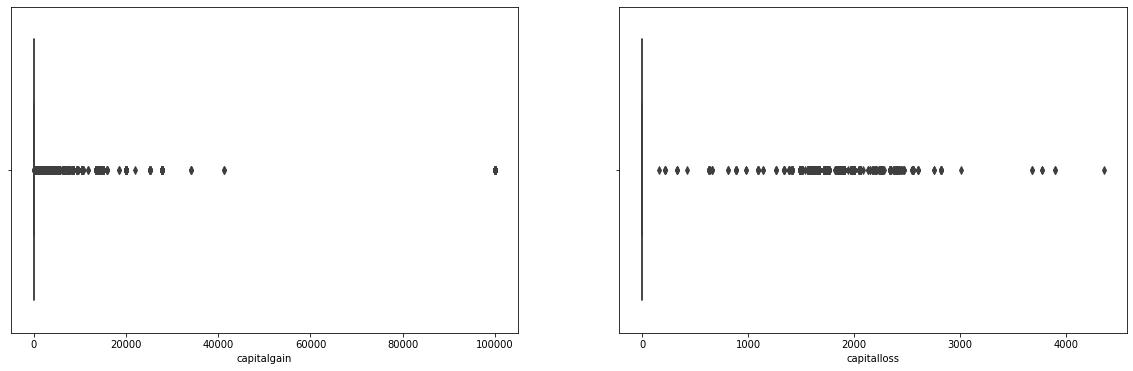

In [79]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x=raw_data["capitalgain"])
plt.subplot(1,2,2)
sns.boxplot(x=raw_data["capitalloss"])

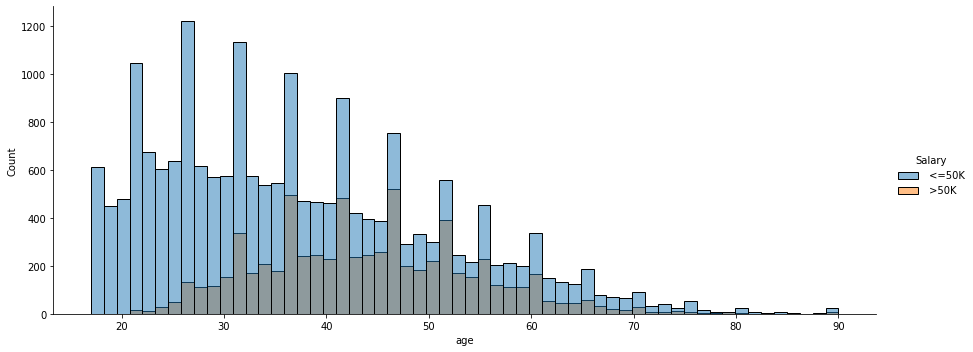

In [80]:
sns.displot(raw_data, x='age', hue='Salary', aspect=20/8)

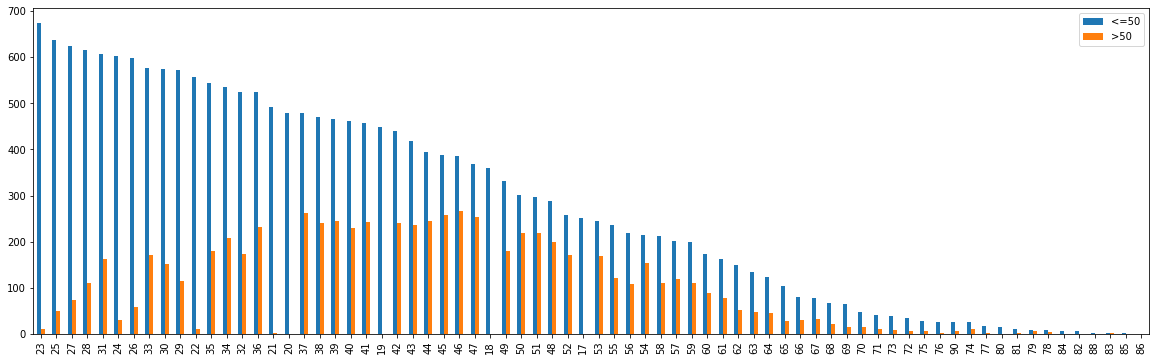

In [81]:
temp_df = pd.DataFrame()
temp_df['<=50'] = raw_data[raw_data['Salary'] == ' <=50K']['age'].value_counts()
temp_df['>50'] = raw_data[raw_data['Salary'] == ' >50K']['age'].value_counts()
temp_df.plot.bar(figsize=(20,6))

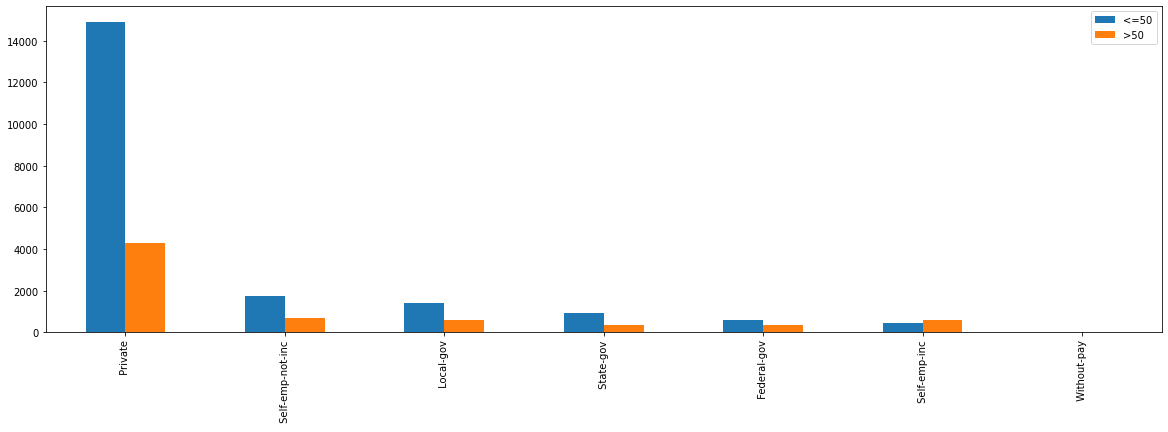

In [82]:
temp_df = pd.DataFrame()
temp_df['<=50'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
temp_df['>50'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
temp_df.plot.bar(figsize=(20,6))

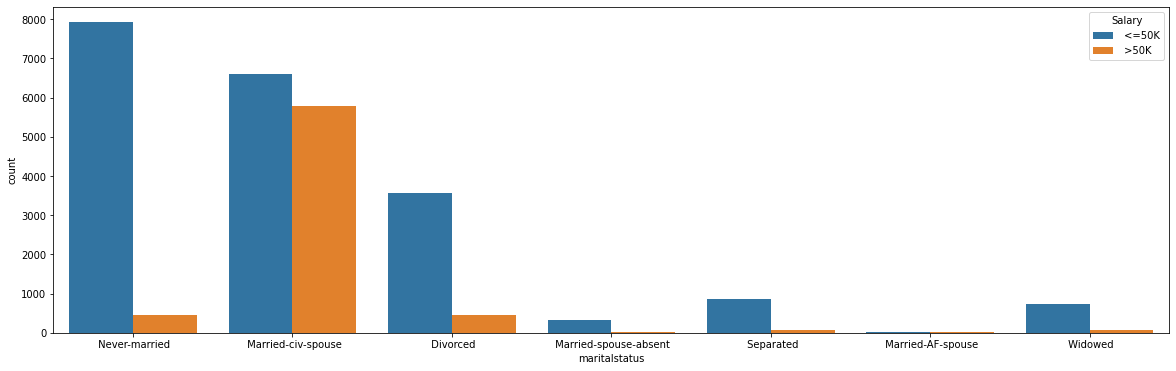

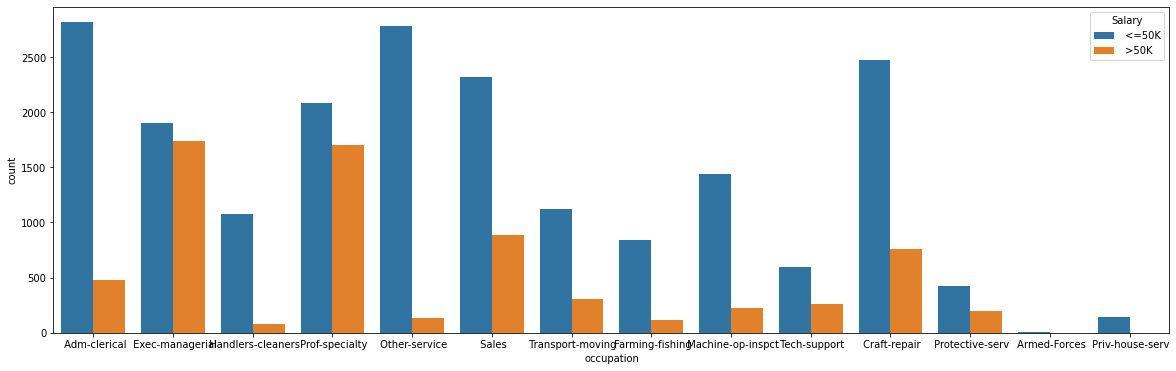

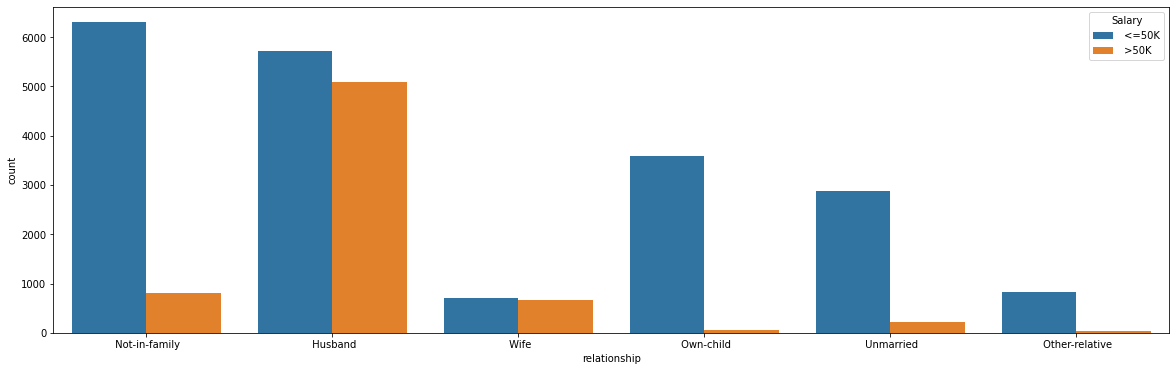

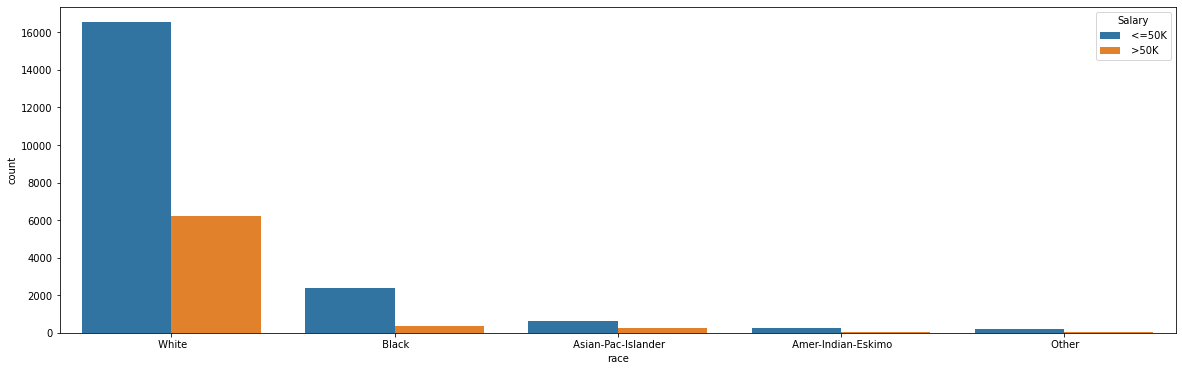

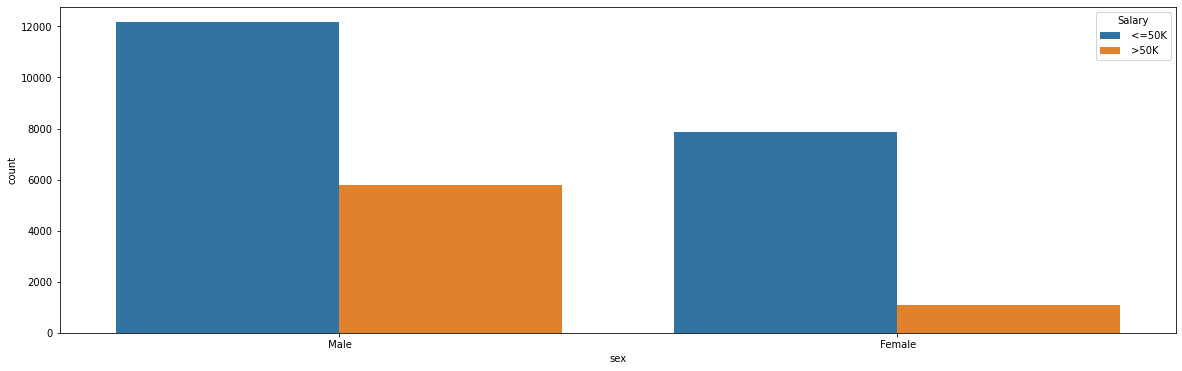

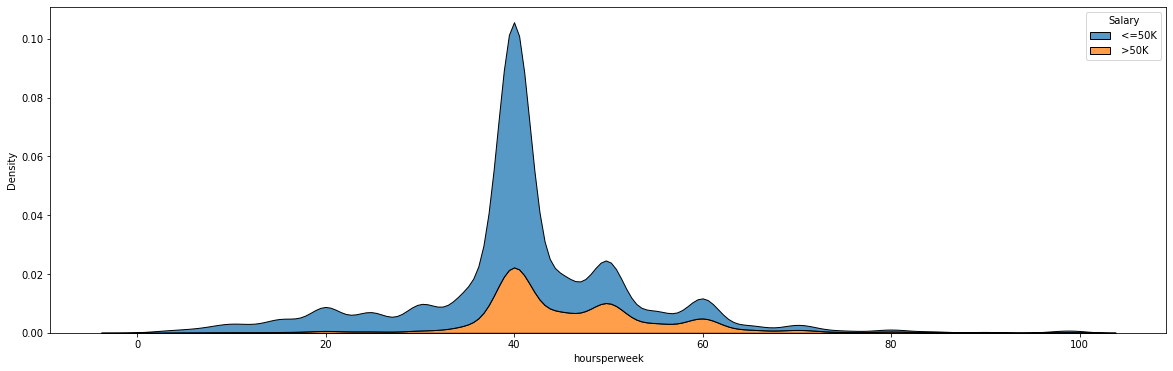

In [83]:

plt.figure(figsize=(20,6))
sns.countplot(x=raw_data['maritalstatus'],hue=raw_data['Salary'])
plt.figure(figsize=(20,6))
sns.countplot(data=raw_data, x='occupation', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=raw_data, x='relationship', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=raw_data, x='race', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=raw_data, x='sex', hue='Salary')
plt.figure(figsize=(20,6))
sns.kdeplot(data=raw_data, x='hoursperweek', hue='Salary', multiple="stack")

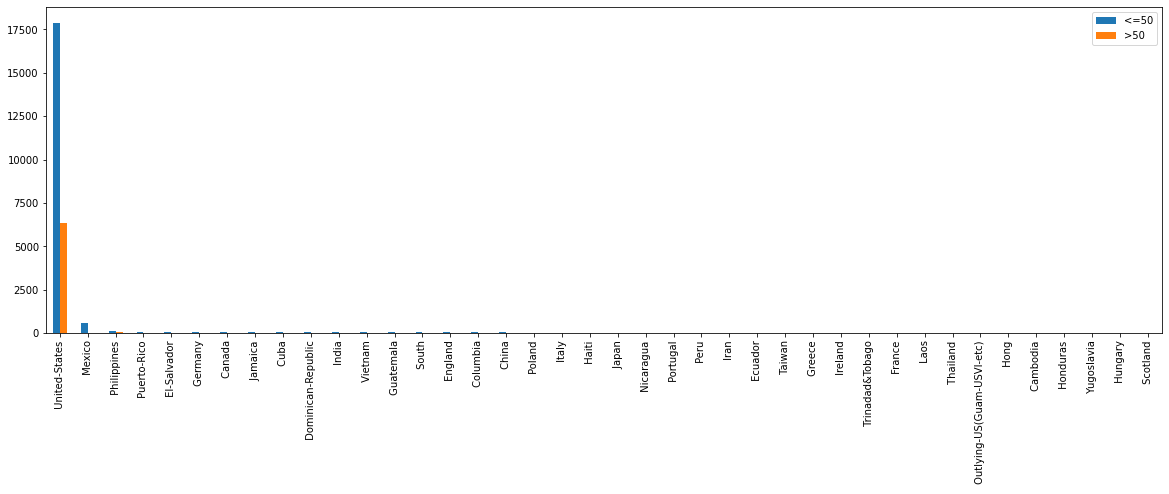

In [84]:
temp_df = pd.DataFrame()
temp_df['<=50'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
temp_df['>50'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
temp_df.plot.bar(figsize=(20,6))

In [85]:
from sklearn import preprocessing 

df = raw_data.copy()
label_encoder = preprocessing.LabelEncoder()
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df["Salary"]=label_encoder.fit_transform(df["Salary"])

df.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
5,37,2,14,2,3,5,4,0,0,0,40,37,0
6,49,2,5,3,7,1,2,0,0,0,16,21,0
7,52,4,9,2,3,0,4,1,0,0,45,37,1
8,31,2,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,13,2,3,0,4,1,5178,0,40,37,1


In [86]:
raw_data_test.shape

(15060, 14)

In [87]:
raw_data_test = raw_data_test.drop(["education"], axis=1)
print(raw_data.shape)
raw_data_test.columns

(26903, 13)


Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [88]:
data = raw_data_test.copy()
label_encoder = preprocessing.LabelEncoder()
data["workclass"]=label_encoder.fit_transform(data["workclass"])
data["maritalstatus"]=label_encoder.fit_transform(data["maritalstatus"])
data["sex"]=label_encoder.fit_transform(data["sex"])
data["race"]=label_encoder.fit_transform(data["race"])
data["occupation"]=label_encoder.fit_transform(data["occupation"])
data["relationship"]=label_encoder.fit_transform(data["relationship"])
data["native"]=label_encoder.fit_transform(data["native"])
data["Salary"]=label_encoder.fit_transform(data["Salary"])

data.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0
5,63,4,15,2,9,0,4,1,3103,0,32,37,1
6,24,2,10,4,7,4,4,0,0,0,40,37,0
7,55,2,4,2,2,0,4,1,0,0,10,37,0
8,65,2,9,2,6,0,4,1,6418,0,40,37,1
9,36,0,13,2,0,0,4,1,0,0,40,37,0


In [89]:
data['capitalgain'].value_counts()

0        13808
15024      161
7688       121
7298       111
99999       81
         ...  
2329         1
3273         1
2346         1
34095        1
2036         1
Name: capitalgain, Length: 110, dtype: int64

In [90]:
X_train = df.drop('Salary',axis=1)
Y_train = df['Salary']
X_test = data.drop('Salary',axis=1)
Y_test = data['Salary']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((26903, 12), (26903,), (15060, 12), (15060,))

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [140]:
nb_clf_1 = GaussianNB()
nb_clf_1.fit(X_train, Y_train)
Y_pred_1 = nb_clf_1.predict(X_test)
Y_pred_train_1 = nb_clf_1.predict(X_train)
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_1)*100)
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_1)*100)
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy_train: 79.17332639482586
Accuracy_test: 79.44223107569721
[[10806   554]
 [ 2542  1158]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.68      0.31      0.43      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.78      0.79      0.76     15060



In [103]:
nb_clf_2 = MultinomialNB()
nb_clf_2.fit(X_train, Y_train)
Y_pred_2 = nb_clf_2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy: 0.7749667994687915
[[10891   469]
 [ 2920   780]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [104]:
nb_clf_3 = BernoulliNB()
nb_clf_3.fit(X_train, Y_train)
Y_pred_3 = nb_clf_3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_3))
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy: 0.7222443559096946
[[8168 3192]
 [ 991 2709]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80     11360
           1       0.46      0.73      0.56      3700

    accuracy                           0.72     15060
   macro avg       0.68      0.73      0.68     15060
weighted avg       0.79      0.72      0.74     15060



In [105]:
nb_clf_4 = CategoricalNB()
nb_clf_4.fit(X_train, Y_train)
Y_pred_4 = nb_clf_4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_4))
print(confusion_matrix(Y_test, Y_pred_4))
print(classification_report(Y_test, Y_pred_4))

Accuracy: 0.853054448871182
[[10406   954]
 [ 1259  2441]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11360
           1       0.72      0.66      0.69      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.79      0.80     15060
weighted avg       0.85      0.85      0.85     15060



In [106]:
nb_clf_5 = ComplementNB()
nb_clf_5.fit(X_train, Y_train)
Y_pred_5 = nb_clf_5.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_5))
print(confusion_matrix(Y_test, Y_pred_5))
print(classification_report(Y_test, Y_pred_5))

Accuracy: 0.7749667994687915
[[10891   469]
 [ 2920   780]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [107]:
nb_clf_6 = ComplementNB()
nb_clf_6.fit(X_train, Y_train)
Y_pred_6 = nb_clf_6.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_6))
print(confusion_matrix(Y_test, Y_pred_6))
print(classification_report(Y_test, Y_pred_6))

Accuracy: 0.7749667994687915
[[10891   469]
 [ 2920   780]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [134]:
grid = {'var_smoothing': np.logspace(0,-9, num=100)}
estimator = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)

In [135]:
nb_cv_7 = GridSearchCV(estimator=estimator, param_grid=grid, cv= cv, scoring='accuracy', return_train_score=False,verbose=1)
nb_cv_7.fit(X_train, Y_train)
print(nb_cv_7.best_params_)
training_accuracy = nb_cv_7.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(training_accuracy))

Y_pred_7 = nb_cv_7.predict(X_test)

print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_7))
print(confusion_matrix(Y_test, Y_pred_7))
print(classification_report(Y_test, Y_pred_7))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 0.001873817422860383}
Accuracy for our training dataset with tuning is : 79.76%
Accuracy_test: 0.798273572377158
[[10961   399]
 [ 2639  1061]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     11360
           1       0.73      0.29      0.41      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.63      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [136]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y_train)
print('Before',counter)

smt = SMOTE(random_state=7)
X_train_smt, Y_train_smt = smt.fit_resample(X_train, Y_train)

counter = Counter(Y_train_smt)
print('After',counter)

Before Counter({0: 20023, 1: 6880})
After Counter({0: 20023, 1: 20023})


In [139]:
nb_clf_8 = CategoricalNB()
nb_clf_8.fit(X_train, Y_train)
Y_pred_8 = nb_clf_8.predict(X_test)
Y_pred_train_8 = nb_clf_8.predict(X_train)
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_8)*100)
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_8)*100)
print(confusion_matrix(Y_test, Y_pred_8))
print(classification_report(Y_test, Y_pred_8))

Accuracy_train: 85.13176969111251
Accuracy_test: 85.3054448871182
[[10406   954]
 [ 1259  2441]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11360
           1       0.72      0.66      0.69      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.79      0.80     15060
weighted avg       0.85      0.85      0.85     15060

